# Demo EEFxTMS_2F (equatorial electric field)

> Authors: Ashley Smith
>
> Abstract: Access to the equatorial electric field (level 2 product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

2020-03-12T14:47:16+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.6.0
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2


In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np

request = SwarmRequest()

## EEFxTMS_2F product information

Dayside equatorial electric field, sampled at every dayside equator crossing +- 20mins


Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#EEFxTMS_2F

### Check what "EEF" data variables are available

In [3]:
request.available_collections("EEF", details=False)

{'EEF': ['SW_OPER_EEFATMS_2F', 'SW_OPER_EEFBTMS_2F']}

In [4]:
request.available_measurements("EEF")

['EEF', 'RelErr', 'flags']

## Fetch all the EEF values from Bravo during 2016

In [5]:
request.set_collection("SW_OPER_EEFBTMS_2F")
request.set_products(measurements=["EEF", "RelErr"])
data = request.get_between(
    dt.datetime(2016,1,1),
    dt.datetime(2017,1,1)
)

[1/1] Processing:  100%|███████████████████████████████████████████████████|  [ Elapsed: 00:03, Remaining: 00:00 ]
      Downloading: 100%|█████████████████████████████████████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.296MB)


In [6]:
data.sources[:3], data.sources[-3:]

(['SW_OPER_EEFBTMS_2F_20160101T005224_20160101T225919_0103',
  'SW_OPER_EEFBTMS_2F_20160102T003414_20160102T224110_0103',
  'SW_OPER_EEFBTMS_2F_20160103T001603_20160103T222302_0103'],
 ['SW_OPER_EEFBTMS_2F_20161228T003534_20161228T224107_0102',
  'SW_OPER_EEFBTMS_2F_20161229T001641_20161229T222215_0102',
  'SW_OPER_EEFBTMS_2F_20161229T235749_20161230T233857_0102'])

In [7]:
df = data.as_dataframe()
df.head()

,Latitude,RelErr,Longitude,EEF,Spacecraft
Timestamp,,,,,
2016-01-01 00:52:25,7.187098,0.356176,113.751205,-0.000758,B
2016-01-01 02:27:08,7.466371,0.280210,89.976870,-0.000659,B
2016-01-01 04:02:05,6.861260,0.341369,66.179520,-0.000349,B
2016-01-01 05:36:45,7.330604,0.454075,42.410120,-0.000203,B
2016-01-01 07:10:50,10.010381,0.745044,18.697549,-0.000235,B


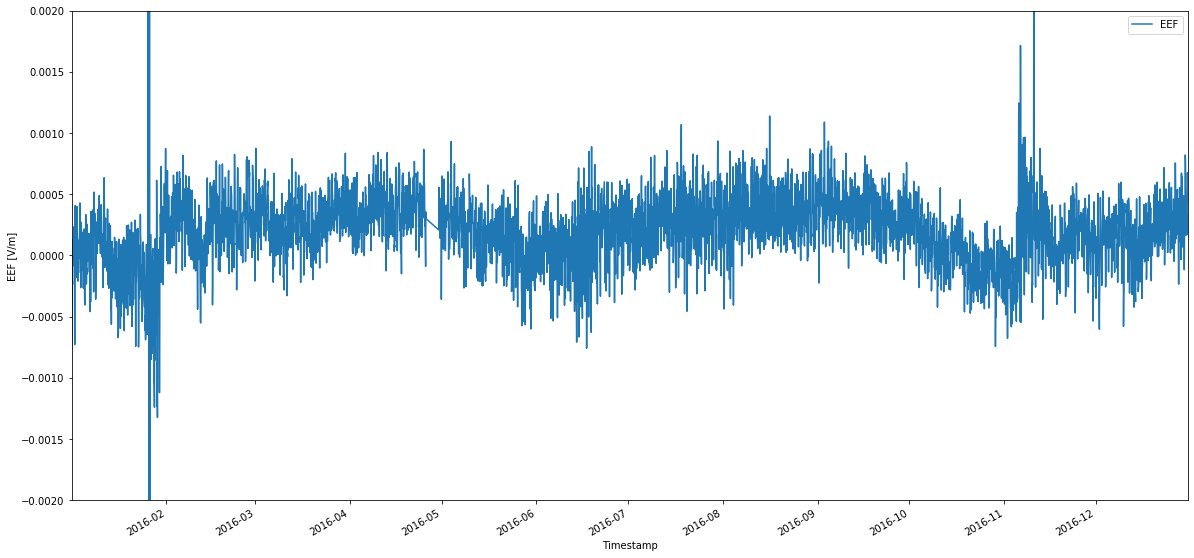

In [8]:
ax = df.plot(y="EEF", figsize=(20,10))
ax.set_ylim((-0.002, 0.002));
ax.set_ylabel("EEF [V/m]");

Take a look at the time jumps between entries...

In [9]:
times = df.index
np.unique(np.sort(np.diff(times.to_pydatetime())))[:20]

array([datetime.timedelta(days=-1, seconds=1117), datetime.timedelta(0),
       datetime.timedelta(seconds=2561), datetime.timedelta(seconds=2616),
       datetime.timedelta(seconds=2620), datetime.timedelta(seconds=2712),
       datetime.timedelta(seconds=2786), datetime.timedelta(seconds=2838),
       datetime.timedelta(seconds=2901), datetime.timedelta(seconds=3011),
       datetime.timedelta(seconds=3066), datetime.timedelta(seconds=3126),
       datetime.timedelta(seconds=5489), datetime.timedelta(seconds=5490),
       datetime.timedelta(seconds=5491), datetime.timedelta(seconds=5492),
       datetime.timedelta(seconds=5493), datetime.timedelta(seconds=5494),
       datetime.timedelta(seconds=5495), datetime.timedelta(seconds=5496)],
      dtype=object)

In [10]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (Timestamp: 5503)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T00:52:25 ... 2016-12-30T23:38:58
Data variables:
    Spacecraft  (Timestamp) object 'B' 'B' 'B' 'B' 'B' ... 'B' 'B' 'B' 'B' 'B'
    Latitude    (Timestamp) float64 7.187 7.466 6.861 ... -7.104 -3.499 -0.3318
    EEF         (Timestamp) float64 -0.0007581 -0.0006586 ... 0.0006749 0.000611
    RelErr      (Timestamp) float64 0.3562 0.2802 0.3414 ... 0.4233 0.4449
    Longitude   (Timestamp) float64 113.8 89.98 66.18 ... -108.7 -132.6 -156.4
Attributes:
    Sources:         ['SW_OPER_EEFBTMS_2F_20160101T005224_20160101T225919_010...
    MagneticModels:  []
    RangeFilters:    []